### 190648C
### VIKASITHA K.S.S.
#### ASSIGNMENT 01

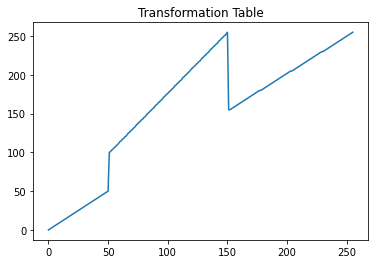

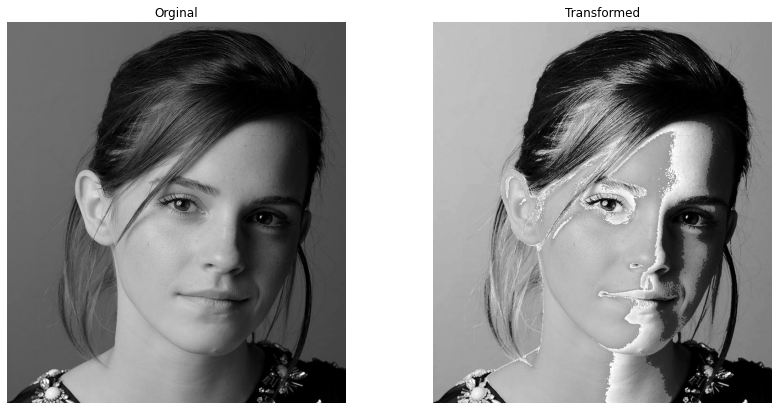

In [30]:
#Q1

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread(r'Assignment-01 Materials\emma_gray.jpg')
assert im is not None

t1 = np.linspace(0,50,51)
t2 = np.linspace(100,255,100)
t3 = np.linspace(155,255,105)

t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
g = cv.LUT(im,t)

fig , ax = plt.subplots()
ax.plot(t)
ax.set_title("Transformation Table")

fig , ax = plt.subplots(1,2,figsize=(14,7))
ax[0].imshow(im,cmap='gray', vmin=0,vmax=255)
ax[0].set_title("Orginal")
ax[0].axis('off')
ax[1].imshow(g,cmap='gray', vmin=0,vmax=255)
ax[1].set_title("Transformed")
ax[1].axis('off')
plt.show()



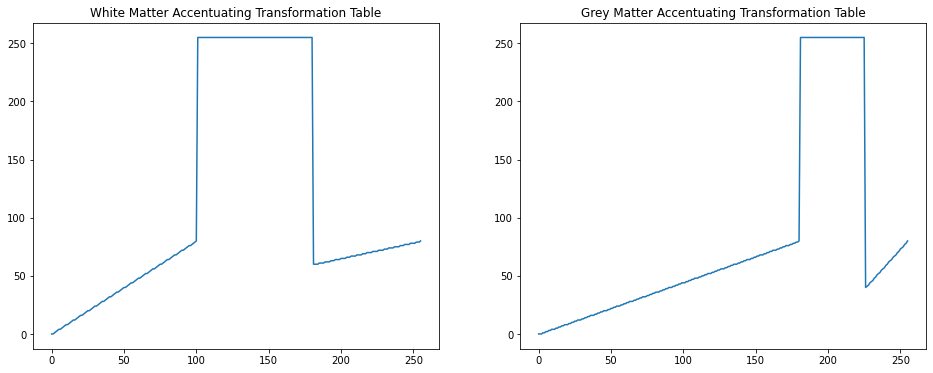

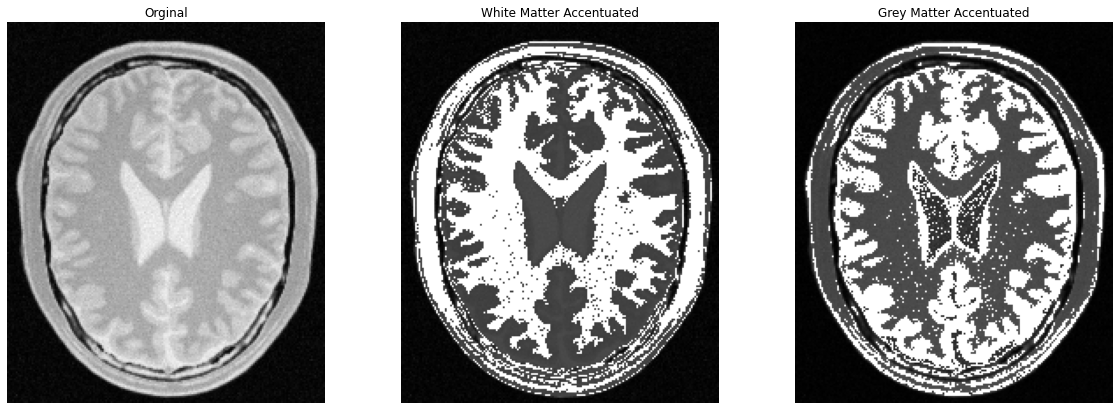

In [84]:
#Q2

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread(r'Assignment-01 Materials\brain_proton_density_slice.png')
assert im is not None

# White Matter Accentuating Transformation Table
t1 = np.linspace(0,80,101)
t2 = np.linspace(255,255,80)
t3 = np.linspace(60,80,75)

# Grey Matter Accentuating Transformation Table
t1_ = np.linspace(0,80,181)
t2_ = np.linspace(255,255,45)
t3_ = np.linspace(40,80,30)

t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
g = cv.LUT(im,t)

t_ = np.concatenate((t1_,t2_,t3_),axis=0).astype(np.uint8)
g_ = cv.LUT(im,t_)

fig , ax = plt.subplots(1,2,figsize=(16,6))
ax[0].plot(t)
ax[0].set_title("White Matter Accentuating Transformation Table")
ax[1].plot(t_)
ax[1].set_title("Grey Matter Accentuating Transformation Table")

fig , ax = plt.subplots(1,3,figsize=(20,7))
ax[0].imshow(im,cmap='gray', vmin=0,vmax=255)
ax[0].set_title("Orginal")
ax[0].axis('off')
ax[1].imshow(g,cmap='gray', vmin=0,vmax=255)
ax[1].set_title("White Matter Accentuated")
ax[1].axis('off')
ax[2].imshow(g_,cmap='gray', vmin=0,vmax=255)
ax[2].set_title("Grey Matter Accentuated")
ax[2].axis('off')
plt.show()


Gamma = 0.5


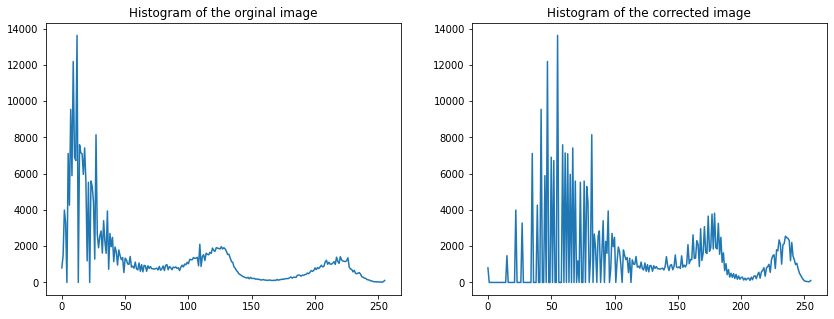

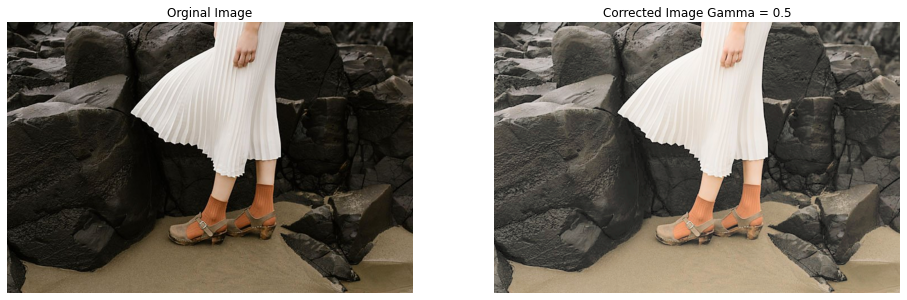

In [42]:
#Q3

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread(r'Assignment-01 Materials\highlights_and_shadows.jpg')
assert im is not None

g = cv.cvtColor(im, cv.COLOR_BGR2LAB)

hist_o = cv.calcHist([g],[0],None,[256],[0,256])

gamma = 0.5

for i in range(g.shape[0]):
    for j in range(g.shape[1]):
        g[i,j,0]=(g[i,j,0]/255)**gamma*255

hist_c = cv.calcHist([g],[0],None,[256],[0,256])

im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
g = cv.cvtColor(g, cv.COLOR_LAB2RGB)

fig , ax = plt.subplots(1,2, figsize = (14,5))
ax[0].plot(hist_o)
ax[0].set_title("Histogram of the orginal image")
ax[1].plot(hist_c)
ax[1].set_title("Histogram of the corrected image")

print("Gamma =",gamma)

fig , ax = plt.subplots(1,2,figsize=(16,10))
ax[0].imshow(im)
ax[0].set_title("Orginal Image")
ax[0].axis('off')
ax[1].imshow(g)
ax[1].set_title("Corrected Image Gamma = "+str(gamma))
ax[1].axis('off')
plt.show()


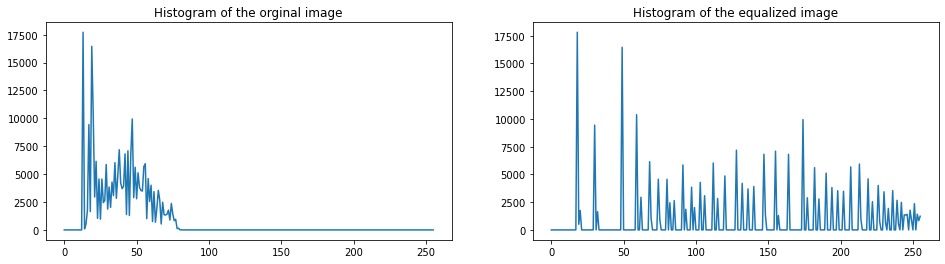

In [37]:
#Q4
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread(r'Assignment-01 Materials\shells.png',cv.IMREAD_GRAYSCALE)
assert im is not None

# Histogram Equalization function
def histEqualization(img):
    his = np.zeros(256)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            his[img[i,j]] += 1
    cum_sum = np.concatenate((np.array([his[0]]),np.zeros(255)))
    for i in range(1,256):
        cum_sum[i]=his[i]+cum_sum[i-1]
    a = (255/cum_sum[-1])
    b = a*cum_sum
    b = np.array([round(i) for i in b])
    g = cv.LUT(img,b)
    return g

hist_o = cv.calcHist([im],[0],None,[256],[0,256])
im_ = (histEqualization(im)).astype(np.uint8)
hist_e = cv.calcHist([im_],[0],None,[256],[0,256])

fig , ax = plt.subplots(1,2, figsize=(16,4))
ax[0].plot(hist_o)
ax[0].set_title("Histogram of the orginal image")
ax[1].plot(hist_e)
ax[1].set_title("Histogram of the equalized image")
plt.show()